# LaRoSeDa Dataset

A Large and Romanian Sentiment Data Set. LaRoSeDa contains 15,000 reviews written in Romanian, of which 7,500 are positive and 7,500 negative. The samples have one of four star ratings: 1 or 2 - for reviews that can be considered of negative polarity, and 4 or 5 for the positive ones. The 15,000 samples featured in the corpus and labelled with the star rating, are splitted in a train and test subsets, with 12,000 and 3,000 samples in each subset.

Links:
*https://huggingface.co/datasets/laroseda*
*https://hackernoon.com/nlp-datasets-from-huggingface-how-to-access-and-train-them-i22u35t9*

In [61]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from datasets import list_datasets, load_dataset
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
lsrd_train = load_dataset('laroseda', split='train')
lsrd_test = load_dataset('laroseda', split='test')

Found cached dataset laroseda (C:/Users/dinosaph/.cache/huggingface/datasets/laroseda/laroseda/1.0.0/ba712fe2b636cb6ff925a84e4f8568e81f1b584def346542c5835eda79aecc6c)
Found cached dataset laroseda (C:/Users/dinosaph/.cache/huggingface/datasets/laroseda/laroseda/1.0.0/ba712fe2b636cb6ff925a84e4f8568e81f1b584def346542c5835eda79aecc6c)


In [16]:
print(lsrd_train, lsrd_test)
# lsrd_train.set_format(type='pandas', columns=['content', 'starRating'])
lsrd_train_df = lsrd_train.to_pandas()
lsrd_test_df = lsrd_test.to_pandas()

Dataset({
    features: ['index', 'title', 'content', 'starRating'],
    num_rows: 12000
}) Dataset({
    features: ['index', 'title', 'content', 'starRating'],
    num_rows: 3000
})


In [34]:
corpus = lsrd_train_df[['content', 'starRating']]
corpus = corpus.rename(columns={'content': 'Text', 'starRating':'Sentiment'}) #, inplace=True)
# Setting 'Sentiment' as 1 (positive) for 4+ rating stars, 0 (negative) for 0-3 rating stars
corpus['Sentiment'] = np.where(corpus['Sentiment'] > 3, 1, 0)
corpus.head()

,Text,Sentiment
0,ca aspect este foarte frumoasa dar cine vrea s...,1
1,se incarca repede si tine 3 incarcari complete...,0
2,in primul rand nu este de stica dupa cum spune...,1
3,nu merita cumparate... sunt create cu limitare...,1
4,un ceas excelent. face cam tot ce ai nevoie ca...,0


In [41]:
RO_STOP_WORDS = None
# From: https://www.kaggle.com/code/mpwolke/romanian-stop-words-w2v
with open(r'data/romanian_stop_words.txt', 'r') as f:
    ro_sw = f.readlines()
    ro_sw = set(w.strip() for w in ro_sw)
    RO_STOP_WORDS = list(frozenset(ro_sw))
print(RO_STOP_WORDS)

['cat', 'acel', 'toata', 'fara', 'iar', 'multe', 'caruia', 'lui', 'carora', 'conform', 'decit', 'alaturi', 'cate', 'le', 'acest', 'ce', 'mult', 'niciodata', 'atatea', 'cine', 'nimic', 'toti', 'acestui', 'acestea', 'vreo', 'au', 'pe', 'unor', 'u', 'o', 'intr-o', 'alta', 'sa-mi', 'cata', 'acelasi', 'fata', 'intrucat', 'alti', 'abia', 'prea', 'aceea', 'sub', 'va', 'fost', 'sau', 'daca', 'incat', 'nou', 'citeva', 'cit', 'avea', 'ia', 'imi', 'totul', 'ba', 'cum', 'mai', 'bine', 'j', 'vom', 'un', 'fi', 'dintr-o', 'asupra', 'cind', 'spre', 'k', 'capat', 'in', 'voi', 'ala', 'oricum', 'nimeni', 'alte', 'il', 'acum', 'inapoi', 'astfel', 'asemenea', 'are', 'cele', 'pentru', 'ele', 'careia', 'tot', 'aia', 'din', 'care', 'ei', 'chiar', 'atitea', 'cineva', 'l', 'degraba', 'despre', 'ale', 'doar', 'cea', 'eu', 'f', 'pai', 'numai', 'atata', 'uneori', 'plus', 'atare', 'peste', 'cumva', 'r', 'el', 'or', 'tuturor', 'foarte', 'ti', 'acea', 'aceste', 'iti', 'parca', 'nu', 'era', 't', 'ati', 'sint', 'i', 'n

In [75]:
def clean_txt(doc):
    # Normalize txt
    new_doc = doc.lower()
    # Removing symbols and such
    # new_doc = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|\d+", "", new_doc)
    # Removing stop words
    new_doc = ' '.join([w for w in new_doc.split() if w not in RO_STOP_WORDS])
    return new_doc

In [76]:
corpus['Text'] = [clean_txt(t) for t in corpus['Text']]
corpus.head()

,Text,Sentiment
0,aspect frumoasa vrea joace tastatura poate,1
1,incarca repede tine incarcari complete telefon...,0
2,primul rand stica spune producatorul plastic l...,1
3,merita cumparate create limitare volum volumul...,1
4,ceas excelent nevoie vreme nul compari telefon...,0


In [77]:
count_vectorize = CountVectorizer()
feature_vector =  count_vectorize.fit(corpus.Text)
features = feature_vector.get_feature_names()
print("total number of features: ", len(features))

total number of features:  18741


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [78]:
import random
random.sample(features,10)

['curatat',
 'descopera',
 'portabila',
 'impaturit',
 'recomandarile',
 'continuat',
 'pierderi',
 'sirena',
 'imbina',
 'furnizorul']

In [79]:
train_ds_features = count_vectorize.transform(corpus.Text)
type(train_ds_features)

scipy.sparse.csr.csr_matrix

In [80]:
train_ds_features.getnnz()

194489

In [81]:
print("Density of the matrix: ", train_ds_features.getnnz()*100/(train_ds_features.shape[0]*train_ds_features.shape[1]))

Density of the matrix:  0.08648106646745994


In [82]:
train_ds_df = pd.DataFrame(train_ds_features.todense())
train_ds_df.columns = features
corpus[0:1]

,Text,Sentiment
0,aspect frumoasa vrea joace tastatura poate,1


Text(0, 0.5, 'Density')

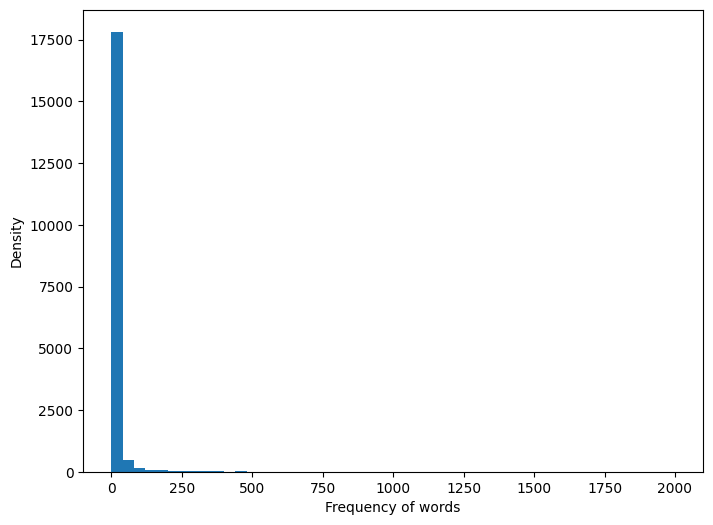

In [83]:
features_counts = np.sum(train_ds_features.toarray(),axis=0)
features_counts_df = pd.DataFrame(dict(features = features, counts = features_counts))
plt.figure(figsize=(8,6))
plt.hist(features_counts_df.counts, bins=50, range=(0,2000))
plt.xlabel("Frequency of words")
plt.ylabel('Density')

In [84]:
len(features_counts_df[features_counts_df.counts==1])

9674

In [85]:
count_vectorizer =  CountVectorizer(max_features=1000)
feature_vector = count_vectorizer.fit(corpus.Text)
features = feature_vector.get_feature_names()
train_ds_features = count_vectorizer.transform(corpus.Text)
features_counts =  np.sum(train_ds_features.toarray(),axis=0)
features_counts = pd.DataFrame(dict(features = features, counts = features_counts))
features_counts.sort_values('counts', ascending=False)[0:15]

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,features,counts
757,recomand,2428
92,bateria,1528
109,bun,1512
408,incarca,1488
711,produs,1482
124,calitate,1390
912,telefonul,1340
617,ok,1322
110,buna,1204
911,telefon,1186
